# Introduction

This notebook presents simple fully-connected **Autoencoder** applied to MNIST dataset.

**Contents**

* [MNIST Dataset](#CIFAR-10-Dataset) - load and preprocess dataset
* [Autoencoder](#Autoencoder) - make and train model

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Limit TensorFlow GPU memory usage

In [2]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config):
    pass  # init sessin with allow_growth

# MNIST Dataset

Load dataset, we only need train images, no need for labels

In [3]:
(x_train_raw, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train_raw / 255
x_train = x_train.reshape([len(x_train), -1])
print('x_train:')
print('shape', x_train.shape)
print('data')
print(x_train[0, 300:400].round(2))

x_train:
shape (60000, 784)
data
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.55 0.99 0.75 0.01 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.04 0.75 0.99 0.27 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.14 0.95 0.88 0.63 0.42 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


Show example images

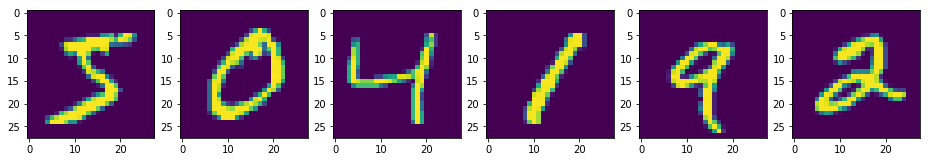

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=[16, 9])
for i in range(len(axes)):
    axes[i].imshow(x_train_raw[i])

# Autoencoder

Simple fully-connected autoencoder

In [6]:
from tensorflow.keras.layers import InputLayer, Dense

In [7]:
model = tf.keras.Sequential()
model.add(InputLayer(input_shape=(784,)))
model.add(Dense(units=128, activation='elu'))
model.add(Dense(units=784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')

Helper function to show images during training

In [8]:
def show_progress(test_inputs, test_outputs):
    fig, (axes1, axes2) = plt.subplots(nrows=2, ncols=10, figsize=[20,4])
    for i in range(len(axes1)):
        axes1[i].imshow(test_inputs[i].reshape([28,28]))
        axes2[i].imshow(test_outputs[i].reshape([28,28]))
        axes1[i].set_title('input')
        axes2[i].set_title('output')
        axes1[i].axis('off')
        axes2[i].axis('off')
    plt.show()

Show autoencoder reconstructions before training, this will be just noise

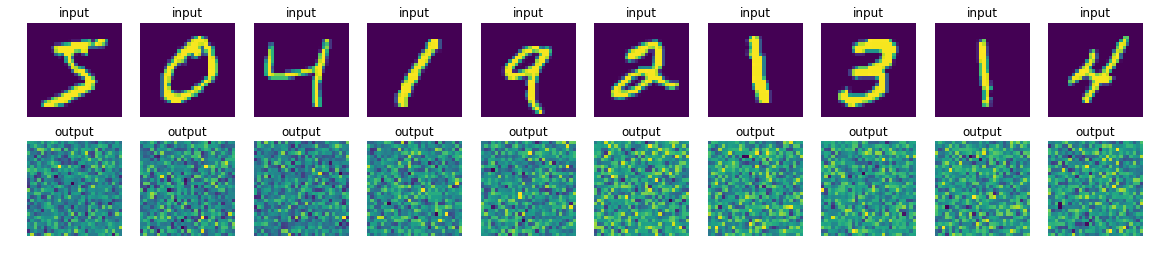

In [9]:
test_inputs = x_train[0:10]
test_outputs = model.predict(test_inputs)
show_progress(test_inputs, test_outputs)

Train model

In [10]:
hist = model.fit(x_train, x_train, batch_size=200, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.1986
Epoch 2/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.1076
Epoch 3/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0904
Epoch 4/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0830
Epoch 5/5
60000/60000 [==============================] - 1s 24us/step - loss: 0.0788


Show model reconstructions after training

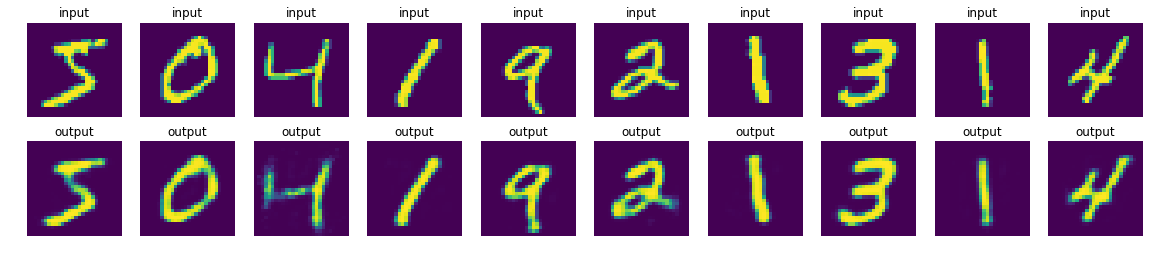

In [11]:
test_outputs = model.predict(test_inputs)
show_progress(test_inputs, test_outputs)